<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">MLG Poisson (Número de premios en estudiantes buenos en matemáticas) INTERPRETACIÓN</h2>


#### Oscar Julian Layton

En el siguiente ejemplo se identifica el número de premios ganados por 200 estudiantes en una escuela secundaria. Los predictores de la cantidad de premios obtenidos incluyen el tipo de programa en el que el estudiante se matriculó (por ejemplo, vocacional, general o académico) y el puntaje en su examen final de matemáticas.

En este ejemplo:


* **num_awardses**: la variable de resultado e indica el número de premios ganados por los estudiantes en una escuela secundaria en un año.
* **mathes**: una variable predictiva continua y representa los puntajes de los estudiantes en su examen final de matemáticas.
* **proges**: una variable predictiva categórica con tres niveles indicando el tipo de programa en el que se matricularon los estudiantes. Se codifica como 1 = “General”, 2 = “Académico” y 3 = “Vocacional”.


In [2]:
#ESTAS LINEAS ES PARA LLAMAR LAS FUNCIONES REALIZADAS POR EL DOCENTE hernando vanegas
setwd("") #busca por default en una carpeta en especifica todo.
source("macros.txt")#Lllamar el archivo de macros que está en la carpeta especifica,(son una fuciines especificas del profesor)
# awards <- read.csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")   #datos disrectamente desde la web.
awards<-read.csv("awards.csv")#Lllamar csv base
head(awards,n=10)


id,num_awards,prog,math
45,0,3,41
108,0,1,41
15,0,3,44
67,0,3,42
153,0,3,40
51,0,1,42
164,0,3,46
133,0,3,40
2,0,3,33
53,0,3,46


In [3]:
awards <- within(awards, {
  prog <- factor(prog, levels=1:3, labels=c("General", "Academic", 
                                                     "Vocational"))
  id <- factor(id)
})
summary(awards)
head(awards)

       id        num_awards           prog          math      
 1      :  1   Min.   :0.00   General   : 45   Min.   :33.00  
 2      :  1   1st Qu.:0.00   Academic  :105   1st Qu.:45.00  
 3      :  1   Median :0.00   Vocational: 50   Median :52.00  
 4      :  1   Mean   :0.63                    Mean   :52.65  
 5      :  1   3rd Qu.:1.00                    3rd Qu.:59.00  
 6      :  1   Max.   :6.00                    Max.   :75.00  
 (Other):194                                                  

id,num_awards,prog,math
45,0,Vocational,41
108,0,General,41
15,0,Vocational,44
67,0,Vocational,42
153,0,Vocational,40
51,0,General,42


In [4]:
with(awards, tapply(num_awards, prog, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))

General               Academic             Vocational 
"M (SD) = 0.20 (0.40)" "M (SD) = 1.00 (1.28)" "M (SD) = 0.24 (0.52)"

Loading required package: ggplot2


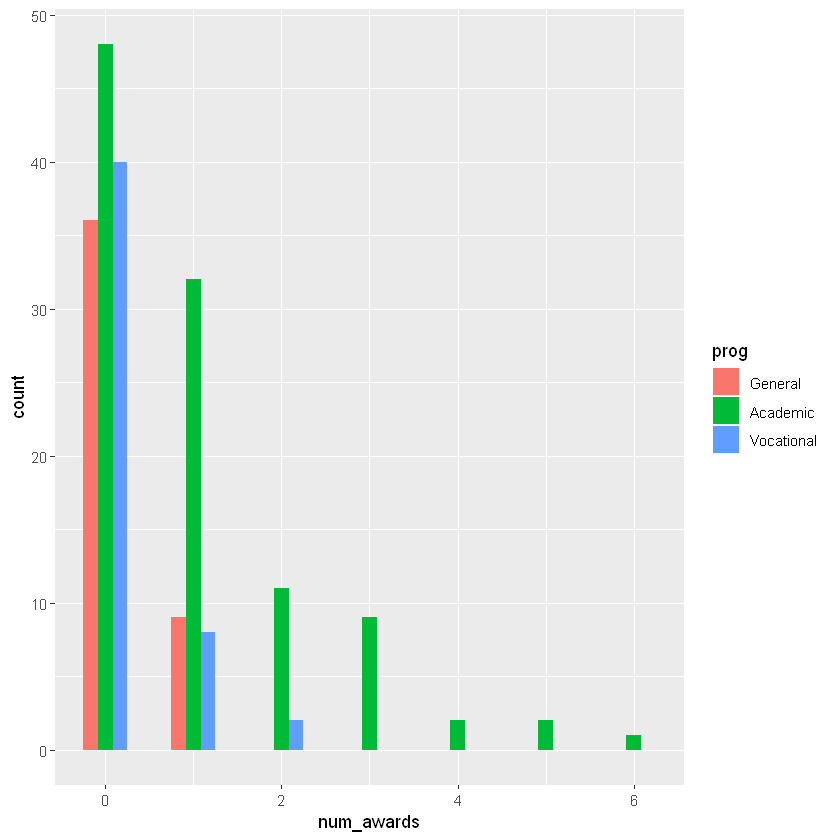

In [5]:
require(ggplot2)
ggplot(awards, aes(num_awards, fill = prog)) +
  geom_histogram(binwidth=.5, position="dodge")

In [7]:
table(awards$num_awards)                     #Realizando tabla de frecuencias con respecto al número de premios.
awards$prog <- relevel(awards$prog ,ref=1)   #Estableciendo como categoria de base general.


  0   1   2   3   4   5   6 
124  49  13   9   2   2   1 

En la anterior gráfica se puede establecer que hay 124 estudiantes tienen 0 premios, de igual forma trece con 2 premios y 1 estudiante con 6 premios. No obstante se procede realizar un ajuste al modelo donde la variable de respuesta es el número de premios, hay que considerar que **prog** es una variable dummie, asi como la presencia de interacciones lo cual establece un número mayor de parámetros en el modelo:

In [8]:
fit1 = glm(num_awards ~ prog*math, family = poisson, data = awards)  #rta Poisson y función de enlace Logaritmo 
summary(fit1)


Call:
glm(formula = num_awards ~ prog * math, family = poisson, data = awards)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2295  -0.7958  -0.5298   0.2528   2.6826  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)         -3.86179    2.49317  -1.549    0.121
progAcademic        -0.44107    2.60299  -0.169    0.865
progVocational      -0.84473    2.86990  -0.294    0.768
math                 0.04400    0.04721   0.932    0.351
progAcademic:math    0.02841    0.04870   0.583    0.560
progVocational:math  0.02290    0.05421   0.422    0.673

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 287.67  on 199  degrees of freedom
Residual deviance: 189.10  on 194  degrees of freedom
AIC: 377.16

Number of Fisher Scoring iterations: 6


conociendo que el anterior modelo es el **más complejo** en términos de ajuste se procede a realizar un step_glm para poder determinar el modelo más conveniente en términos de AIC o BIC. Usamos un criterio **BIC** bajo el procedimiento **backward** el cual simplificará el modelo:

In [9]:
step_glm(fit1, criterion="BIC", direction = "backward")   #forward  o  backward


  Family:  poisson 
    Link:  log 

Initial model:
num_awards ~ 1 + prog + math + prog:math 

Step 0 :    
            Df      BIC      AIC   Deviance+ Pearson^ p-value*
- prog:math  2   386.6978 373.5045    0.3314   0.3849   0.8364
<none>           396.9464 377.1565    0.3257   0.3902         

Step 1 :  - prog:math 
       Df      BIC      AIC   Deviance+ Pearson^  p-value*
<none>      386.6978 373.5045    0.3314   0.3849          
- prog  2   390.6728 384.0762    0.2872   0.3430    0.0021
- math  1   426.4098 416.5149    0.1767   0.2481 3.625e-11

+ Adjusted R-squared based on the residual deviance
^ Adjusted R-squared based on the Pearson statistic
* p-value of the Wald test

Final model:
num_awards ~ 1 + prog + math 



El anterior codigo establece el mejor modelo. Si usamos el proceso backward, se tiene: 

* **paso 0**: Si quito la interacción tendría un BIC=386.6978  mucho menor que el BIC de no hacer nada. luego es aconsejable quitar la interacción triple. Con el AIC me da la misma conclusión. COn el R^2 basado en desvio (DECIANCE+) tambien.  Con el R^2 basado en la estadística Pearson **NO quitarlo** (entre mayor mejor). Según el p-valor=0.8364 el cual contrasta la hipótesis de que los dos betas de la interacción son iguales a cero, establece que hay que sacar esa interacción (pues los dos betas son iguales a cero, no se rechazo $H_0$).   **CONCLUSIÓN: Sacar la interacción doble**.

* **paso 1**: Con el BIC, AIC se es necesario no hacer nada BIC= 386.6978 , En el $R^2_d$ se sugiere también no hacer nada igual que el $R^2_p$. Luego:

$$num_awards = 1 + prog + math$$

No obstante se tiene la estimación de los parámetros del modelo final:

In [41]:
fit2 = glm(num_awards ~ prog+math, family = poisson, data = awards)  #rta Poisson y función de enlace Logaritmo natural.
summary(fit2)


Call:
glm(formula = num_awards ~ prog + math, family = poisson, data = awards)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2043  -0.8436  -0.5106   0.2558   2.6796  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -5.24712    0.65845  -7.969 1.60e-15 ***
progAcademic    1.08386    0.35825   3.025  0.00248 ** 
progVocational  0.36981    0.44107   0.838  0.40179    
math            0.07015    0.01060   6.619 3.63e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 287.67  on 199  degrees of freedom
Residual deviance: 189.45  on 196  degrees of freedom
AIC: 373.5

Number of Fisher Scoring iterations: 6


Al tratarse de la función de enlace logaritmo natural la cual es monotamente creciente, se realiza un análisis con respecto a los signos de las estimaciones de los parámetros.

* El número esperado de premios es mayor para los estudiantes inscritos en el **ProgramaAcademico**  que en el **programa general**. 
* El $\beta$ correspoondiente a **progVocational** es casi cero puesto que la significancia que muestra el p-valor establece que no se rechaza $H_0$
* Considerando que la estimación del $\beta$ alusivo a la variable matemáticas es mayor que cero, se tiene que entre mayor sea el puntaje en el puntaje de matematicas el número esperado de premios será mucho mayor (todo lo anterior porque la función de enlace es positiva.)


En lo que concierne a la estimación de parámetros es un modelo lineal generalizado que puede ser descrito como sigue: 

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Poisson(\mu_k), \\
		 log(\mu_k)=\eta_k= \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 Math_{k}\\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   
 ## Interpretación
 
 $$	log(\mu_k)=\eta_k= \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 Math_{k}$$
 

Considerando que se desea comparar a dos estudiantes que pertenecen al mismo programa, ya sea los dos en el general o los dos  en el academico o los dos en el vocacional. Uno de ellos con un puntaje de matemáticas $\delta$ mayor que el otro se describe el número esperado de premios como:

 $$	\mu_k = \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 (x_o + \delta)$$
 
Sacando exponencial para comparar los dos estudiantes y de esta manera determinar el numero esperado de premios, se tiene:
  
 $$\mu_k= \frac{ exp[ \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 (x_o + \delta) ]}{exp[ \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 x_o] } = exp(\delta \beta_4) $$
 
 Lo anterior puede ser puesto que al considerar que los estudiantes provienen del mismo progrmama se anulan muchos términos. No obstante si 
  $$exp(\delta \hat{\beta_4}) = exp( 0.07015)=1.073$$
 
* **Interpretación del puntaje matemáticas:** Por cada unidad adicional en el puntaje de matemátiacas, el número esperado de premios del mayor puntaje es de $7.3 \%$ mayor que el que obtuvo menor puntaje.
 
 En consecuencia si $\delta =5$ (delta es seleccionado en el contexto): 
 
   $$exp(\delta \hat{\beta_4}) = exp(5 *  0.07015)=1.42$$
   
* **Interpretación del puntaje matemáticas:** Por cada 5 unidades adicionales en el puntaje de matemátiacas, el número esperado de premios aumenta aproximadamente  $42\%$. (esto es dejando constante el programa)
 
 
* **Interpretación del programa académico:** Comparando dos estudiante con el mismo puntaje de matemáticas, uno en el programa academico y otro en el programa general (categoria base para poder comparar)

 $$\mu_k= \frac{exp[  \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 Math_k]  }{ exp[ \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 Math_k  ] } $$
 
  $$\mu_k= \frac{exp[  \beta_1 + \beta_2 1 +  0 +\beta_4 Math_k]  }{ exp[ \beta_1 + 0 +  0 +\beta_4 Math_k  ] } = exp(\delta \beta_2) $$
  
En consecuencia si $\delta =1$ (delta es seleccionado en el contexto): 
 
   $$exp(\hat{\beta_2}) = exp(5 *  1.083)=2.96 $$
   
Luego sin importar el puntaje obtenido en la prueba de matemáticas, el numero esperado de premios para los inscritos en el programa academico es 2.96 veces el esperado para los inscritos en el progrmama general (nivel base). 

* **Interpretación con interacciones:** Comparando dos estudiante con el mismo puntaje de matemáticas, uno en el programa academico y otro en el programa general (categoria base para poder comparar)

$$\mu_k= \frac{exp[  \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 Math_k + \beta_5 (ProgAcad:Math) + \beta_6 (ProgVoc:Math)   ]  }{ exp[ \beta_1 + \beta_2 ProgAcad_{k} +  \beta_3 ProgVoc_{k} +\beta_4 Math_k +\beta_5 (ProgAcad:Math) + \beta_6 (ProgVoc:Math)  ] } $$


**¿Cuál es el efecto sobre el número esperado de premios de 5puntos adicionales en el examen de matemáticas para los estudiantes del programa general?**

$$\mu_k= \frac{exp[  \beta_1  + 0  + 0 + \beta_4 (Math_k +\delta)+ 0 +0]  }{ exp[ \beta_1 + 0 + 0 +\beta_4 Math_k +0 + 0  ] } = exp(\delta \beta_4)$$


 En consecuencia como son 5 puntos adicionales $\delta =5$ (delta es seleccionado en el contexto): 
 
   $$exp(\delta \hat{\beta_4}) = exp(5 *  \hat{\beta_4})$$



**¿Cuál es el efecto sobre el número esperado de premios de 5puntos adicionales en el examen de matemáticas para los estudiantes del programa académico?**


$$\mu_k= \frac{exp[  \beta_1  + \beta_2  + 0 + \beta_4 (Math_k +5) +  \beta_5 (Math_k +5) +0]  }{ exp[ \beta_1 + \beta_2 + 0 +\beta_4 Math_k + \beta_5 + 0  ] } = exp(5 \beta_4 + 5\beta_5)$$



In [92]:
exp(coef(fit2)['math'])

math 
1.072672

## GRÁFICAS

Use la predict() función para agregar una nueva columna ( $pred) al awards objeto de datos para los valores pronosticados del modelo original, fit2.  En este caso, no necesitamos proporcionar ninguno newdata. Además, para obtener * recuentos8 predichos (en lugar de recuentos de registros), necesitamos establecer `type = 'response'.

Para trazar los resultados, primero debemos ordenar los datos por **program** y **math**, de modo que las líneas que tracemos sean curvas y no vayan por todo el diagrama. Podemos hacerlo usando la función order() entre corchetes:

In [93]:
awards$pred <- predict(fit2, type = "response") ; head(awards,n=6)        #adicionando una nueva columna de valores predichos
awards2 <- awards[order(awards$prog, awards$math), ] ; head(awards2,n=6)  #ordenando el dataframe por programa

id,num_awards,prog,math,pred
45,0,Vocational,41,0.13519097
108,0,General,41,0.09339886
15,0,Vocational,44,0.16685841
67,0,Vocational,42,0.14501552
153,0,Vocational,40,0.12603202
51,0,General,42,0.10018631


,id,num_awards,prog,math,pred
105,167,0,General,35,0.06131134
16,134,0,General,39,0.08117233
48,111,0,General,39,0.08117233
2,108,0,General,41,0.09339886
74,70,0,General,41,0.09339886
6,51,0,General,42,0.10018631


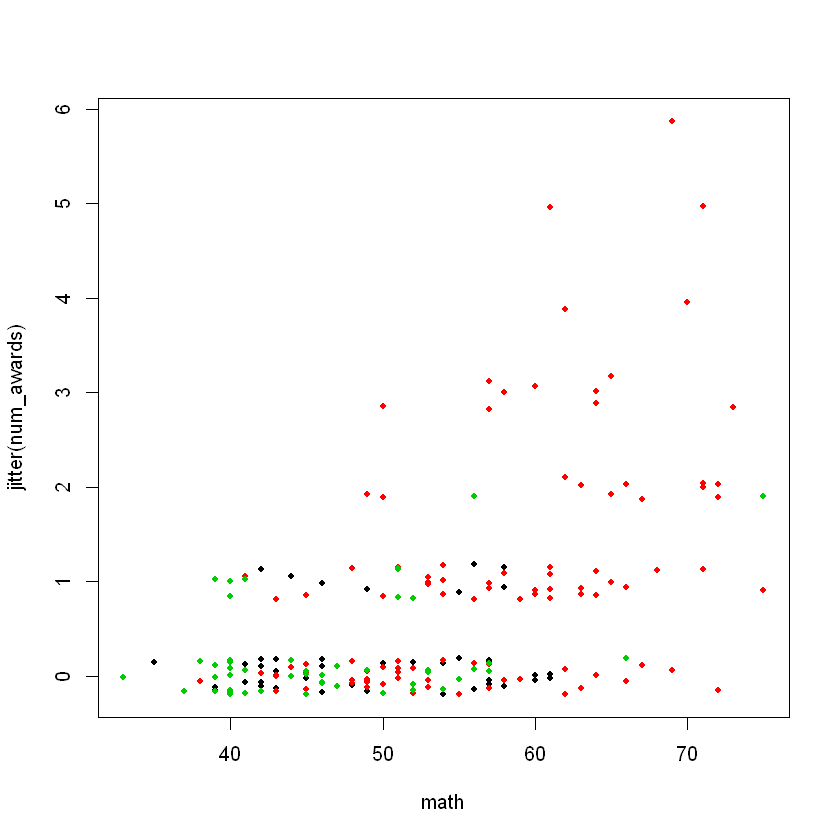

In [94]:
plot(jitter(num_awards) ~ math, data = awards2, col = prog, pch = 20)     #jitter(awards$num_awards) ordena de menor a mayor


Para graficar la curva, Configure la fórmula (es decir, los valores pronosticados en función de la variable continua) y use el data =argumento para subconjuntar solo las filas de datos que desea para cada línea. Primero, trace el grupo **Academic** con los parámetros de línea predeterminados.

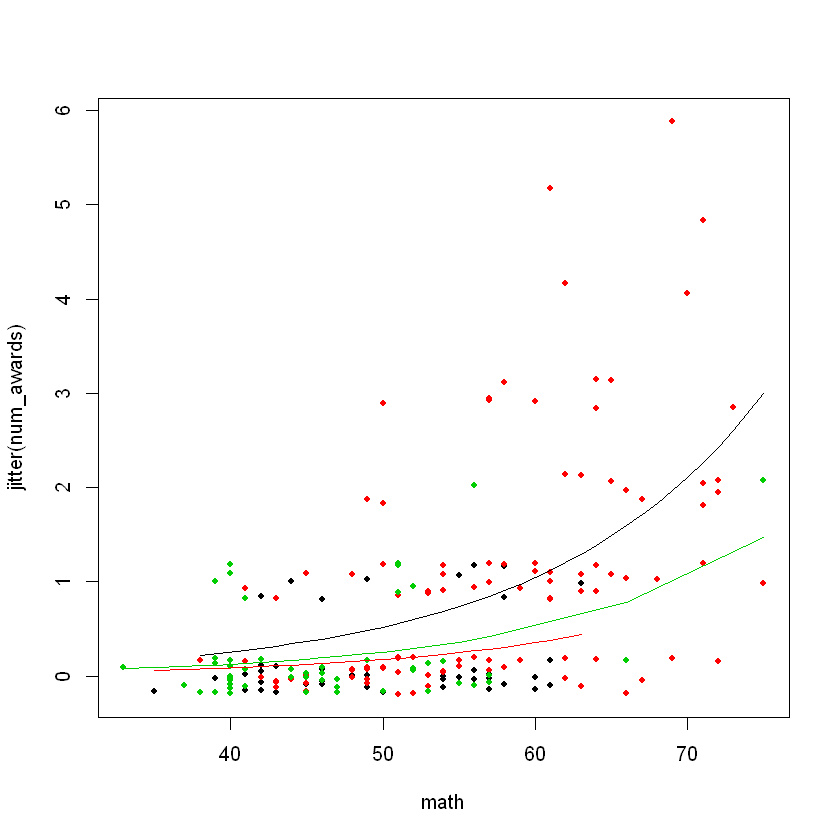

In [57]:
plot(jitter(num_awards) ~ math, data = awards2, col = prog, pch = 20)
lines(pred ~ math, data = awards2[awards2$prog == 'Academic', ])
lines(pred ~ math, data = awards2[awards2$prog == 'General', ], col = 2)
lines(pred ~ math, data = awards2[awards2$prog == 'Vocational', ], col = 3)


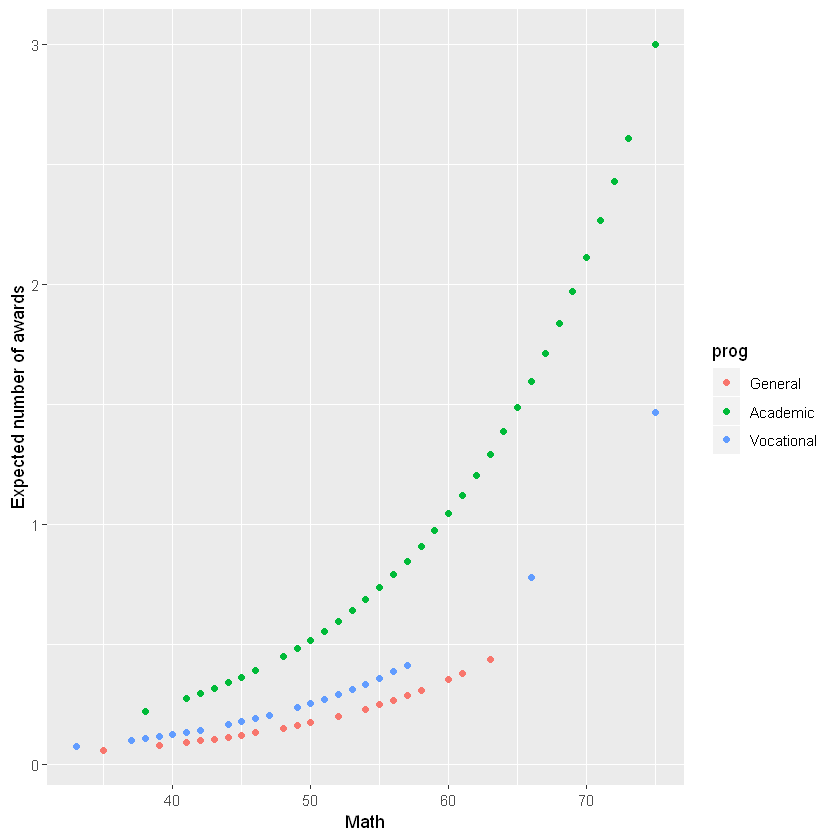

In [69]:
require(ggplot2)
ggplot(data = awards, aes(x = math, y = predict(fit2, type = "response"),
                           colour = prog)) + 
  geom_point() + xlab("Math") + ylab("Expected number of awards")

## Gráfico de los residuos

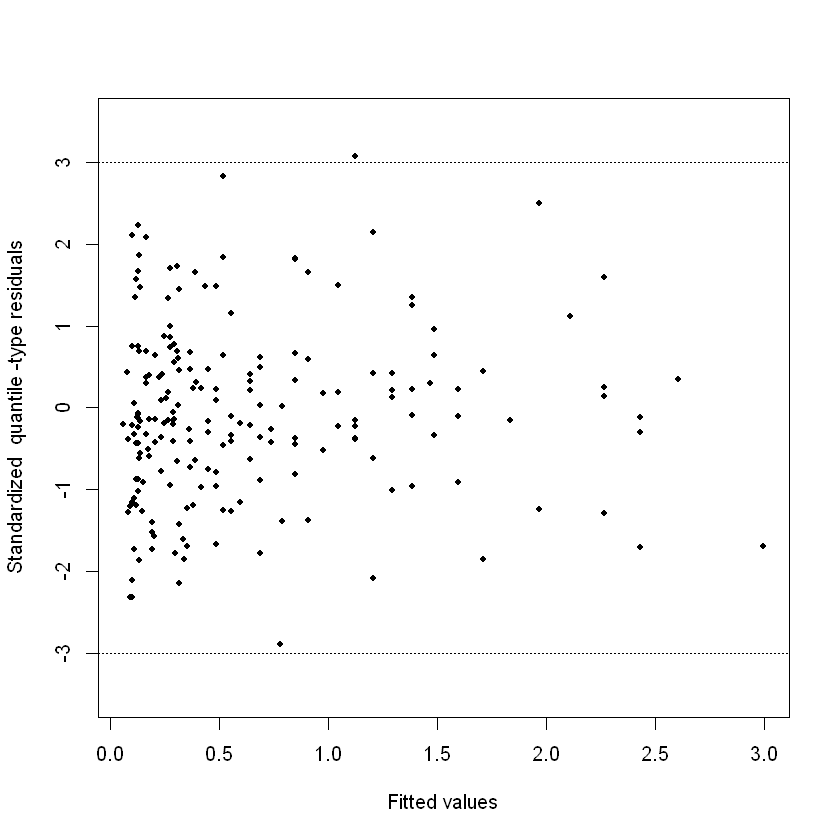

In [70]:
residuals_glm(fit2)

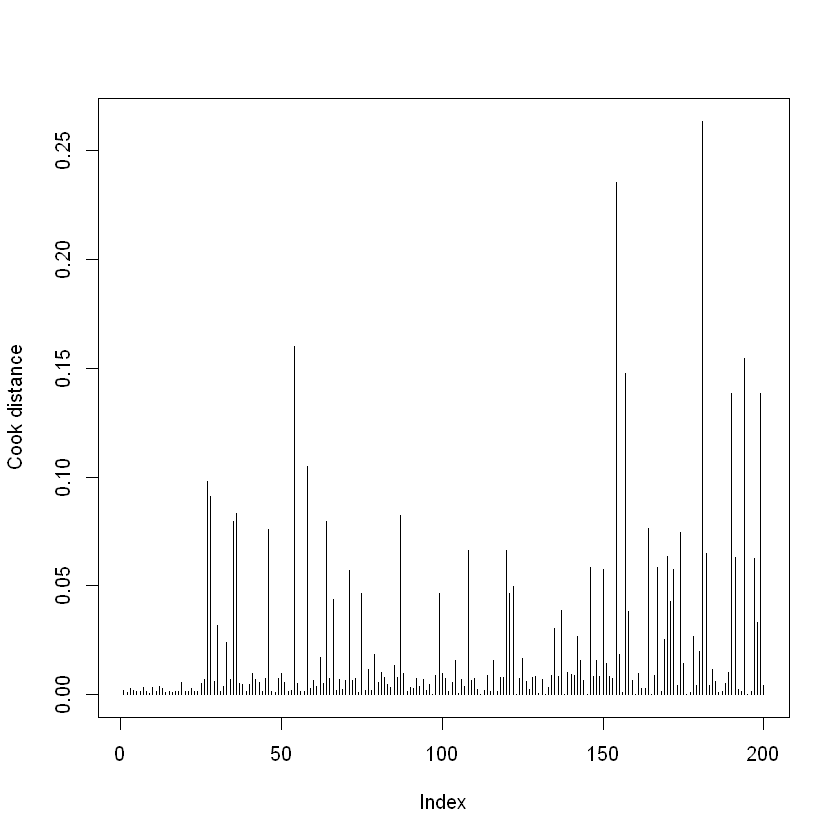

In [75]:
Cookdis_glm(fit2)      #aproximación a la distancia de cook

In [76]:
case.deletion_glm(fit2, subset=-c(54))


               Estimate  Std. Error   Pr(>|z|)  | Estimate* Std. Error*
(Intercept)     -5.24712     0.65845    0.00000 |  -5.43085     0.66826
progAcademic     1.08386     0.35825    0.00248 |   1.03113     0.35938
progVocational   0.36981     0.44107    0.40179 |   0.37256     0.44102
math             0.07015     0.01060    0.00000 |   0.07358     0.01078
                Pr(>|z|)* | Change(%)
(Intercept)       0.00000 |    -3.502
progAcademic      0.00411 |    -4.865
progVocational    0.39823 |     0.745
math              0.00000 |     4.882

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


Quitando el estudiante 54 los signos no cambiaron, la significancia tampoco.

In [79]:
case.deletion_glm(fit2, subset=-c(58))


               Estimate  Std. Error   Pr(>|z|)  | Estimate* Std. Error*
(Intercept)     -5.24712     0.65845    0.00000 |  -5.41774     0.67255
progAcademic     1.08386     0.35825    0.00248 |   1.18071     0.37697
progVocational   0.36981     0.44107    0.40179 |   0.47761     0.45655
math             0.07015     0.01060    0.00000 |   0.07134     0.01064
                Pr(>|z|)* | Change(%)
(Intercept)       0.00000 |    -3.252
progAcademic      0.00174 |     8.936
progVocational    0.29550 |    29.152
math              0.00000 |     1.699

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


Se presenta a continuación los residuos cuantil 

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


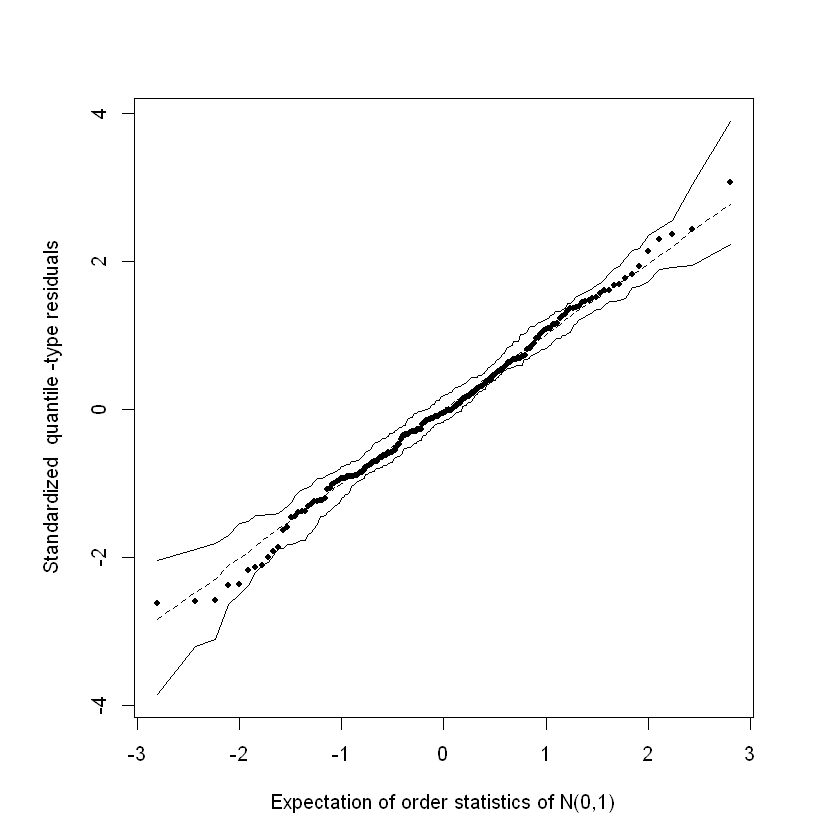

In [91]:
envelope_glm(fit2,conf = 0.90)